In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\insurance.csv")

In [5]:
df.head()

,age,affordibility,insurance
0,21,1,0
1,25,1,0
2,31,0,0
3,50,1,1
4,41,1,1


In [6]:
df.shape

(34, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            34 non-null     int64
 1   affordibility  34 non-null     int64
 2   insurance      34 non-null     int64
dtypes: int64(3)
memory usage: 948.0 bytes


In [8]:
df.describe()

,age,affordibility,insurance
count,34.000000,34.000000,34.000000
mean,35.911765,0.558824,0.500000
std,13.369725,0.503995,0.507519
min,17.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000
50%,34.500000,1.000000,0.500000
75%,44.000000,1.000000,1.000000
max,61.000000,1.000000,1.000000


In [9]:
df.isnull().sum()

age              0
affordibility    0
insurance        0
dtype: int64

In [10]:
df = df.drop("affordibility", axis = 1)

In [11]:
df.head()

,age,insurance
0,21,0
1,25,0
2,31,0
3,50,1
4,41,1


In [12]:
import matplotlib.pyplot as plt

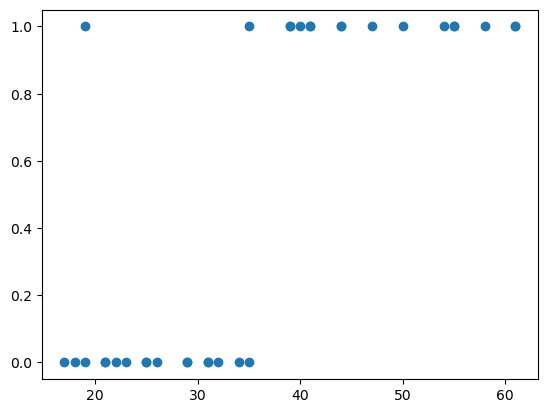

In [13]:
plt.scatter(df['age'], df['insurance'])
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

In [17]:
model.fit(df[['age']], df.insurance)

LogisticRegression()

In [18]:
model.coef_

array([[0.27996302]])

In [19]:
model.intercept_

array([-9.67687081])

In [20]:
model.score(df[['age']], df.insurance)

0.9411764705882353

In [21]:
y_predict = model.predict(df[['age']])

In [47]:
cm = confusion_matrix(df.insurance, y_predict)

In [48]:
cm

array([[17,  0],
       [ 2, 15]], dtype=int64)

<Axes: >

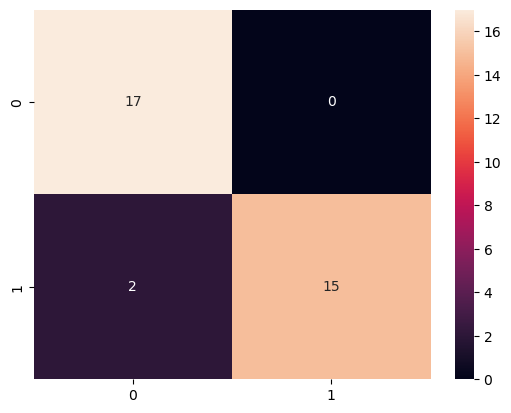

In [49]:
sns.heatmap(cm, annot = True)

In [22]:
y_predict[:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [23]:
df.insurance[:5]

0    0
1    0
2    0
3    1
4    1
Name: insurance, dtype: int64

In [24]:
model.predict([[45]])

D:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [25]:
model.predict([[5]])

D:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df[['age']]
X.head()

,age
0,21
1,25
2,31
3,50
4,41


In [28]:
y = df.insurance
y.head()

0    0
1    0
2    0
3    1
4    1
Name: insurance, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
X_train.shape

(27, 1)

In [31]:
X_test.shape

(7, 1)

In [32]:
y_train.shape

(27,)

In [33]:
y_test.shape

(7,)

In [34]:
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
model.score(X_test, y_test)

0.8571428571428571

In [36]:
predic = model.predict(X_test)

In [37]:
predic

array([0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [38]:
y_test

15    0
19    1
27    1
26    0
8     1
24    0
21    1
Name: insurance, dtype: int64

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
cm = confusion_matrix(y_test, predic)

In [41]:
cm

array([[3, 0],
       [1, 3]], dtype=int64)

In [42]:
import seaborn as sns

<Axes: >

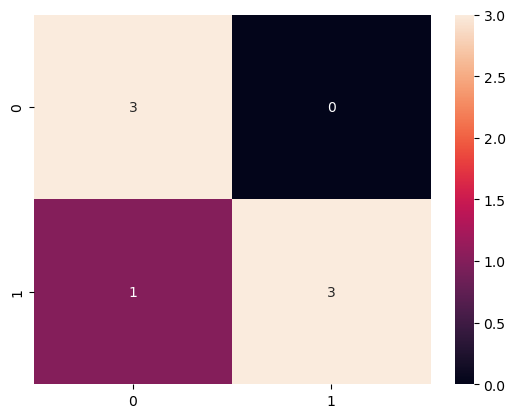

In [45]:
sns.heatmap(cm, annot = True)